Task 2

Step 1:
Data cleaning

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn import metrics
import missingno as mno
from sklearn import linear_model

In [25]:
# Load and check the Data 
df = pd.read_csv("/Users/xiexiaoyang/Documents/NEU learning/Fall-2022/IE 5374/after midtern/Preject 1/World Indicators.csv")
display(df.head(5))
display(df.info())

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    object 
 2   Days to Start Business  181 non-null    float64
 3   Energy Usage            136 non-null    float64
 4   GDP                     188 non-null    object 
 5   Health Exp % GDP        185 non-null    float64
 6   Health Exp/Capita       185 non-null    object 
 7   Hours to do Tax         180 non-null    float64
 8   Infant Mortality Rate   188 non-null    float64
 9   Internet Usage          199 non-null    float64
 10  Lending Interest        131 non-null    float64
 11  Life Expectancy Female  197 non-null    float64
 12  Life Expectancy Male    197 non-null    float64
 13  Mobile Phone Usage      196 non-null    float64
 14  Population 0-14         191 non-null    fl

None

In [32]:
# Step 1-1 Remove the "%", "$" in the object feature and 
df_column=df.columns
df[df_column] = df[df_column].replace({'\$':''}, regex = True)
df[df_column] = df[df_column].replace({'%':''}, regex = True)
df[df_column] = df[df_column].replace({',':''}, regex = True)

# Step 1-2 Encode "Region" feature to categorical feature
from sklearn.preprocessing import OneHotEncoder
encode=OneHotEncoder(sparse=False)
Region_column = df[['Region']] 
Region_encoded=encode.fit_transform(Region_column)
feature_names = encode.get_feature_names_out(input_features=["Region"])
Region_encoded = pd.DataFrame(Region_encoded, columns=feature_names)
df[feature_names]=Region_encoded
df.head(10)
# Step 1-3 Convert the object data to float
df_convert=df.apply(pd.to_numeric,errors="coerce")
df_convert = df_convert.drop(["Region","Country"],axis=1)
display(df_convert.info())
display(df_convert.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    float64
 2   Days to Start Business  181 non-null    float64
 3   Energy Usage            136 non-null    float64
 4   GDP                     188 non-null    float64
 5   Health Exp % GDP        185 non-null    float64
 6   Health Exp/Capita       185 non-null    float64
 7   Hours to do Tax         180 non-null    float64
 8   Infant Mortality Rate   188 non-null    float64
 9   Internet Usage          199 non-null    float64
 10  Lending Interest        131 non-null    float64
 11  Life Expectancy Female  197 non-null    float64
 12  Life Expectancy Male    197 non-null    float64
 13  Mobile Phone Usage      196 non-null    float64
 14  Population 0-14         191 non-null    fl

None

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,...,Population 0-14,Population 15-64,Population 65+,Population Urban,Region_Africa,Region_Asia,Region_Europe,Region_Middle East,Region_Oceania,Region_The Americas
0,0.025,72.0,25.0,41852.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,...,0.272,0.681,0.047,0.682,1.0,0.0,0.0,0.0,0.0,0.0
1,0.046,52.1,66.0,13576.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,...,0.477,0.499,0.024,0.409,1.0,0.0,0.0,0.0,0.0,0.0
2,0.037,65.9,29.0,3761.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,...,0.432,0.539,0.029,0.423,1.0,0.0,0.0,0.0,0.0,0.0
3,0.024,19.5,60.0,2215.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,...,0.340,0.625,0.035,0.565,1.0,0.0,0.0,0.0,0.0,0.0
4,0.042,43.5,13.0,NaN,1.039576e+10,0.064,39.0,270.0,0.068,0.0,...,0.458,0.517,0.025,0.265,1.0,0.0,0.0,0.0,0.0,0.0
5,0.045,51.6,13.0,NaN,2.355652e+09,0.090,21.0,274.0,0.059,0.0,...,0.440,0.535,0.025,0.109,1.0,0.0,0.0,0.0,0.0,0.0
6,0.038,48.8,15.0,6720.0,2.548692e+10,0.054,64.0,654.0,0.064,0.1,...,0.432,0.535,0.032,0.521,1.0,0.0,0.0,0.0,0.0,0.0
7,0.035,54.6,22.0,NaN,2.195599e+09,0.039,19.0,504.0,0.100,0.0,...,0.404,0.558,0.039,0.390,1.0,0.0,0.0,0.0,0.0,0.0
8,0.047,75.8,55.0,NaN,1.215638e+10,0.028,25.0,732.0,0.092,0.0,...,0.487,0.488,0.025,0.220,1.0,0.0,0.0,0.0,0.0,0.0
9,0.036,217.9,22.0,NaN,6.103727e+08,0.036,31.0,100.0,0.061,0.1,...,0.422,0.549,0.029,0.280,1.0,0.0,0.0,0.0,0.0,0.0


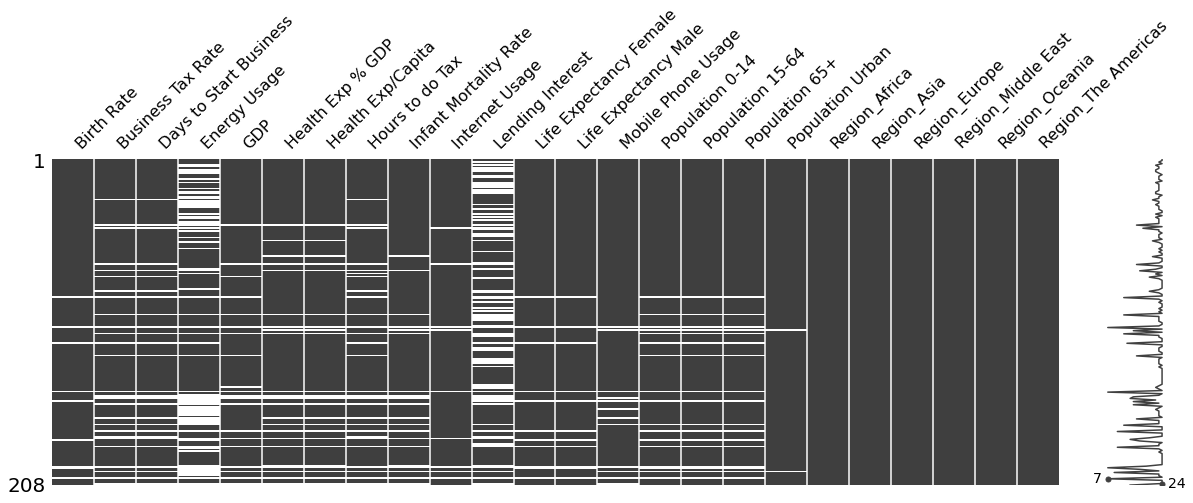

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,...,Population 0-14,Population 15-64,Population 65+,Population Urban,Region_Africa,Region_Asia,Region_Europe,Region_Middle East,Region_Oceania,Region_The Americas
0,0.025000,72.000000,25.000000,1.990709e+11,0.044000,233.000000,451.000000,0.023000,0.100000,72.00000,...,0.272000,0.681000,0.047000,0.682,1.0,0.0,0.0,0.0,0.0,0.0
1,0.046000,52.100000,66.000000,1.041159e+11,0.034000,178.000000,282.000000,0.107000,0.100000,53.00000,...,0.477000,0.499000,0.024000,0.409,1.0,0.0,0.0,0.0,0.0,0.0
2,0.037000,65.900000,29.000000,7.294900e+09,0.045000,34.000000,270.000000,0.060000,0.000000,60.00000,...,0.432000,0.539000,0.029000,0.423,1.0,0.0,0.0,0.0,0.0,0.0
3,0.024000,19.500000,60.000000,1.529242e+10,0.052000,404.000000,152.000000,0.039000,0.100000,46.00000,...,0.340000,0.625000,0.035000,0.565,1.0,0.0,0.0,0.0,0.0,0.0
4,0.042000,43.500000,13.000000,1.039576e+10,0.064000,39.000000,270.000000,0.068000,0.000000,56.00000,...,0.458000,0.517000,0.025000,0.265,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.019511,44.611207,30.352628,3.767045e+11,0.067117,1090.612971,277.701247,0.022937,0.406173,73.52425,...,0.286879,0.635557,0.077418,0.907,0.0,0.0,0.0,0.0,0.0,1.0
204,0.013000,46.500000,5.000000,1.553380e+13,0.177000,8467.000000,187.000000,0.006000,0.700000,81.00000,...,0.197000,0.669000,0.133000,0.809,0.0,0.0,0.0,0.0,0.0,1.0
205,0.015000,41.900000,7.000000,4.723671e+10,0.088000,1213.000000,336.000000,0.010000,0.500000,80.00000,...,0.223000,0.638000,0.139000,0.946,0.0,0.0,0.0,0.0,0.0,1.0
206,0.020000,62.800000,141.000000,3.164822e+11,0.045000,487.000000,864.000000,0.014000,0.400000,77.00000,...,0.291000,0.651000,0.058000,0.888,0.0,0.0,0.0,0.0,0.0,1.0


Birth Rate                0
Business Tax Rate         0
Days to Start Business    0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Urban          0
Region_Africa             0
Region_Asia               0
Region_Europe             0
Region_Middle East        0
Region_Oceania            0
Region_The Americas       0
dtype: int64

In [85]:
# Step 1-4 Check the null values and removed the columns with null values more than 30%

mno.matrix(df_convert, figsize = (20, 6))
plt.show()

# Remove column"Energy Usage" and "Lending Interest"
df_convert = df_imputed.drop(["Energy Usage","Lending Interest"],axis=1)
# Step 1-5 Deal with the Null values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=100,random_state=0)

column_after_encode=df_convert.columns
df_imputed=pd.DataFrame(imp.fit_transform(df_convert),columns=column_after_encode)
display(df_imputed)
df_imputed.isnull().sum()

,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Mobile Phone Usage,Population 15-64,Population 65+,Population Urban
0,72.000000,25.000000,1.990709e+11,0.044000,233.000000,451.000000,0.023000,0.100000,72.00000,0.900000,0.681000,0.047000,0.682
1,52.100000,66.000000,1.041159e+11,0.034000,178.000000,282.000000,0.107000,0.100000,53.00000,0.500000,0.499000,0.024000,0.409
2,65.900000,29.000000,7.294900e+09,0.045000,34.000000,270.000000,0.060000,0.000000,60.00000,0.800000,0.539000,0.029000,0.423
3,19.500000,60.000000,1.529242e+10,0.052000,404.000000,152.000000,0.039000,0.100000,46.00000,1.500000,0.625000,0.035000,0.565
4,43.500000,13.000000,1.039576e+10,0.064000,39.000000,270.000000,0.068000,0.000000,56.00000,0.500000,0.517000,0.025000,0.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,44.611207,30.352628,3.767045e+11,0.067117,1090.612971,277.701247,0.022937,0.406173,73.52425,1.101161,0.635557,0.077418,0.907
204,46.500000,5.000000,1.553380e+13,0.177000,8467.000000,187.000000,0.006000,0.700000,81.00000,0.900000,0.669000,0.133000,0.809
205,41.900000,7.000000,4.723671e+10,0.088000,1213.000000,336.000000,0.010000,0.500000,80.00000,1.400000,0.638000,0.139000,0.946
206,62.800000,141.000000,3.164822e+11,0.045000,487.000000,864.000000,0.014000,0.400000,77.00000,1.000000,0.651000,0.058000,0.888


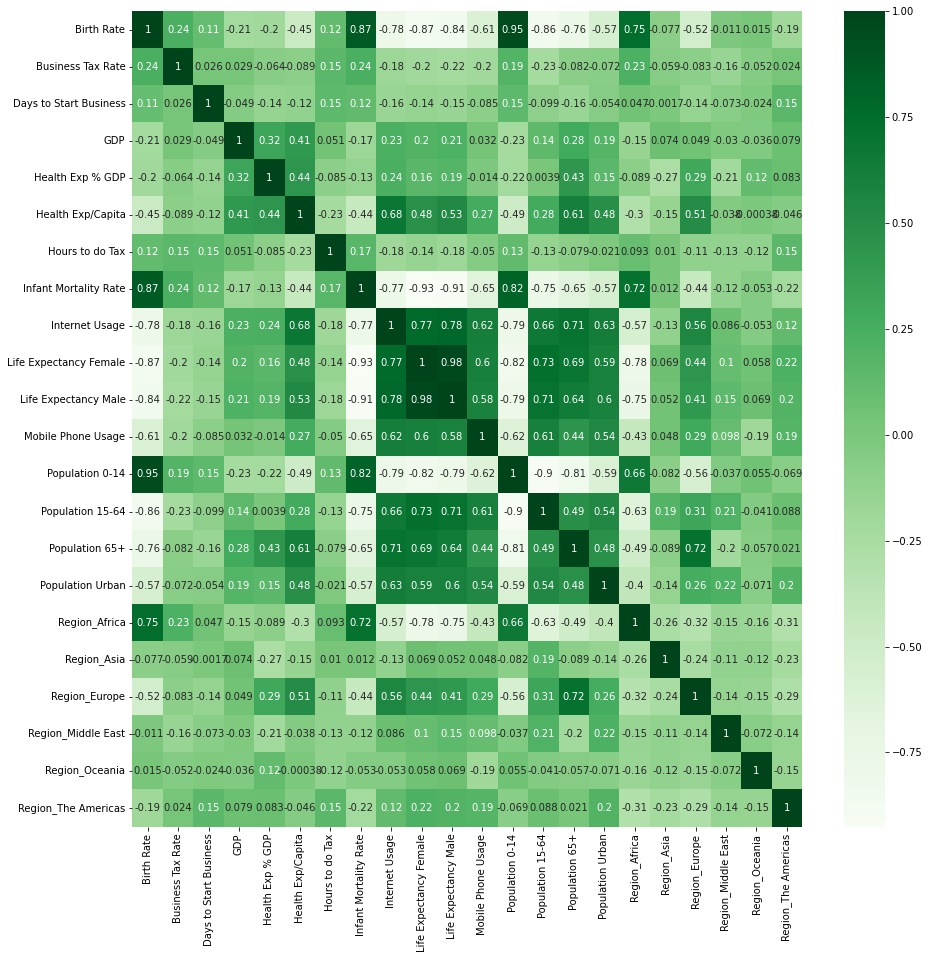

In [86]:
# Step 1-5 Calculate the paired coefficiency and determine the features used in the future clustering
fig=plt.subplots(figsize=(15,15))
sns.heatmap(df_imputed.corr(),cmap='Greens',annot=True)

# Removed the "duplicated" features with high coefficiency which are "Birth Rate", "Population 0-14" and "Life Expectancy Male"
df_removed = df_imputed.drop(["Birth Rate","Population 0-14","Life Expectancy Male","Region_Africa","Region_Asia","Region_Europe","Region_Middle East","Region_Oceania","Region_The Americas"],axis=1)
display(df_removed)

In [97]:
# Step1-6: use Scale and PCA to reduce the dimention 
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
column_df_removed = df_removed.columns
df_scale=pd.DataFrame(scaler.fit_transform(df_removed),columns=column_df_removed)
df_scale.head(10)
# PCA function
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_scale)
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

pca=PCA(n_components=12)
df_afterpca=pca.fit_transform(df_scale)
#columns_df_pca =pca.get_feature_names_out(df_scale.columns)
df_afpca=pd.DataFrame(df_afterpca)
columns = list(df_removed.iloc[:,0:12])
df_pca = df_afpca.copy()
df_pca.columns = columns
display(df_pca)

[0.42205835 0.12671797 0.09237941 0.07303601 0.06405849 0.05454072
 0.04426722 0.03474079 0.03104638 0.02102648 0.01935203 0.01153618
 0.00523998]
[0.42205835 0.54877632 0.64115573 0.71419174 0.77825023 0.83279094
 0.87705816 0.91179895 0.94284533 0.96387182 0.98322385 0.99476002
 1.        ]


,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Mobile Phone Usage,Population 15-64,Population 65+
0,0.682428,-0.916736,0.969840,-0.786483,-0.064752,0.486524,0.026141,0.361267,0.653515,0.095707,-0.023746,-0.727094
1,4.399651,0.490499,0.101833,0.369765,0.597091,0.201741,1.504415,-0.649929,-0.449350,0.266795,-0.904951,0.451163
2,3.039880,0.035662,-0.014223,-0.438449,0.328756,0.204017,0.617017,-0.064219,-0.481885,-0.342897,-0.246780,-0.216527
3,1.753254,-0.882562,-0.512808,0.844374,0.087436,0.223804,1.435571,0.889232,-1.467891,0.612519,-0.707077,-0.292842
4,3.679166,0.802735,-0.734395,-0.035071,-0.286949,-0.047660,0.413781,-0.216701,-0.333915,-0.085453,-0.125772,0.032646
...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.632314,-0.202495,0.327801,-0.086072,0.131272,-0.114466,0.883880,0.536148,0.364952,-0.377050,-0.206890,0.094192
204,-5.207374,9.100596,2.105879,2.137917,-1.399667,6.725118,0.058948,1.618445,-1.170190,-0.331981,0.503534,-0.068736
205,-2.019029,0.029677,0.318750,-0.425455,-0.371434,-1.043660,0.448103,0.588426,-0.014578,-0.731624,-0.512922,0.058573
206,-0.086737,-1.279944,3.288738,0.837289,-0.065557,-0.352567,0.326220,-0.133172,0.774119,-0.229264,0.398605,0.072151


,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Mobile Phone Usage,Population 15-64,Population 65+,Population Urban
0,72.000000,25.000000,1.990709e+11,0.044000,233.000000,451.000000,0.023000,0.100000,72.00000,0.900000,0.681000,0.047000,0.682
1,52.100000,66.000000,1.041159e+11,0.034000,178.000000,282.000000,0.107000,0.100000,53.00000,0.500000,0.499000,0.024000,0.409
2,65.900000,29.000000,7.294900e+09,0.045000,34.000000,270.000000,0.060000,0.000000,60.00000,0.800000,0.539000,0.029000,0.423
3,19.500000,60.000000,1.529242e+10,0.052000,404.000000,152.000000,0.039000,0.100000,46.00000,1.500000,0.625000,0.035000,0.565
4,43.500000,13.000000,1.039576e+10,0.064000,39.000000,270.000000,0.068000,0.000000,56.00000,0.500000,0.517000,0.025000,0.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,44.611207,30.352628,3.767045e+11,0.067117,1090.612971,277.701247,0.022937,0.406173,73.52425,1.101161,0.635557,0.077418,0.907
204,46.500000,5.000000,1.553380e+13,0.177000,8467.000000,187.000000,0.006000,0.700000,81.00000,0.900000,0.669000,0.133000,0.809
205,41.900000,7.000000,4.723671e+10,0.088000,1213.000000,336.000000,0.010000,0.500000,80.00000,1.400000,0.638000,0.139000,0.946
206,62.800000,141.000000,3.164822e+11,0.045000,487.000000,864.000000,0.014000,0.400000,77.00000,1.000000,0.651000,0.058000,0.888


Problem 1: Use K-means and hierarchical clustering methods to group similar countries together

1-1  K-means Clustering

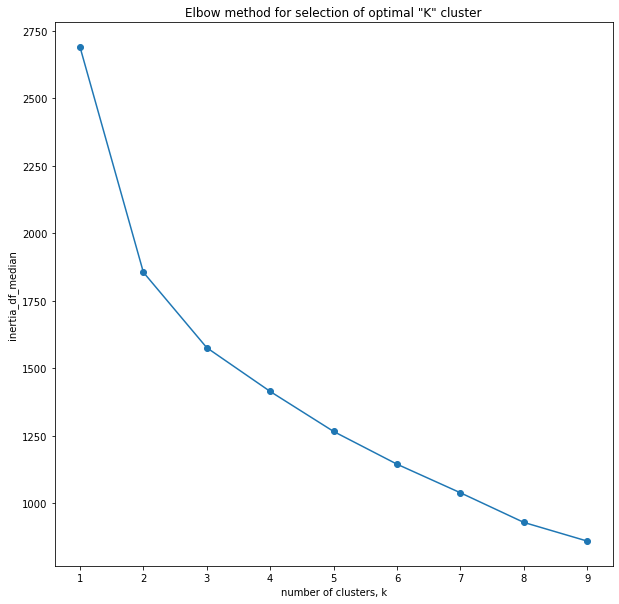

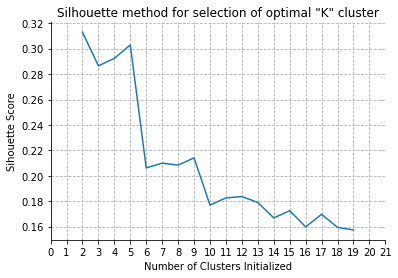

In [95]:
# Use K-means to cluster countries with similar features
# Finding Optimum Value of K. Elbow Method with Within-Cluster-Sum of Squared Error (WCSS)
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertias.append(model.inertia_)

plt.figure(figsize=(10, 10))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia_df_median')
plt.xticks(ks)
plt.title('Elbow method for selection of optimal "K" cluster')
plt.show()

# The Silhouette method to find the Optimum Value of K
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(df_pca).labels_
    score = metrics.silhouette_score(df_pca, labels)
    scores.append(score)

plt.plot(list(range(2,20)),scores)
plt.xticks(range(0,22,1)) 
plt.grid(linestyle='--')
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")
plt.title('Silhouette method for selection of optimal "K" cluster')
sns.despine()


1-2  Hierarchical Clustering

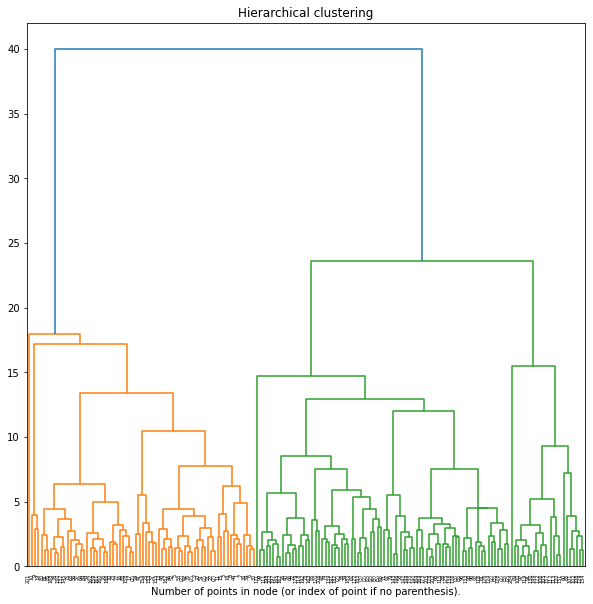

In [91]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_pca)
plt.figure(figsize=(10,10))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.title("Hierarchical clustering")
plt.show()


Problem 2 Use internal validation metrics to report the cluster quality

In [100]:
# Use internal validation metrics
#!pip install validclust
# within cluster evaluation
# Calculate the SSE, CH and silhouette score
mdl_4cluster = KMeans(n_clusters=4)
mdl_3cluster = KMeans(n_clusters=3)
mdl_2cluster = KMeans(n_clusters=2)

mdl_4cluster.fit(df_pca.iloc[:,0:12])
mdl_3cluster.fit(df_pca.iloc[:,0:12])
mdl_2cluster.fit(df_pca.iloc[:,0:12])

# Calculate the DI
from validclust import dunn
dist_df_pca = metrics.pairwise_distances(df_pca.iloc[:,0:12])

dunn_4cluster = dunn(dist_df_pca,  mdl_4cluster.labels_)
dunn_3cluster = dunn(dist_df_pca,  mdl_4cluster.labels_)
dunn_2cluster = dunn(dist_df_pca,  mdl_2cluster.labels_)

validationParametrt = {'k':[2,3,4],
                      "SSE":[str(mdl_2cluster.inertia_),str(mdl_3cluster.inertia_),str(mdl_4cluster.inertia_)],
                      "CH":[str(metrics.calinski_harabasz_score(df_pca.iloc[:,0:12], mdl_2cluster.labels_)),str(metrics.calinski_harabasz_score(df_pca.iloc[:,0:12], mdl_3cluster.labels_)),str(metrics.calinski_harabasz_score(df_pca.iloc[:,0:12], mdl_4cluster.labels_))],
                      "DI":[str(dunn_2cluster),str(dunn_3cluster),str(dunn_4cluster)],
                      "Si":[str(metrics.silhouette_score(df_pca.iloc[:,0:12], mdl_2cluster.labels_)),str(metrics.silhouette_score(df_pca.iloc[:,0:12], mdl_3cluster.labels_)),str(metrics.silhouette_score(df_pca.iloc[:,0:12], mdl_4cluster.labels_))]
}

internalValidation = pd.DataFrame(validationParametrt)
display(internalValidation)




,k,SSE,CH,DI,Si
0,2,1854.7033892326795,92.75677674837776,0.061717526875777515,0.3129151650165539
1,3,1575.2801804211763,72.52136513424226,0.06309325615696085,0.28649990665509184
2,4,1420.9844539727912,60.719574812927235,0.06309325615696085,0.29437502436768537


Problem 3-1 Report the best clustering solution

Since the smallest SSE and largest CH, DI and SI indicate the best cluster solution, we choose the k=2 as the optimal "K" in clustering

Problem 3-2 Give a detailed list of all the groups and the countries included within the groups

In [105]:
preds = mdl_2cluster.labels_
kmeans_df = df.iloc[:,18:20]
kmeans_df['Cluster'] = preds
display(kmeans_df)

print("-------------------------------------------")
print('Number of countries in each clusters: \n'+ str(pd.Series(mdl_2cluster.labels_).value_counts()))

print("-------------------------------------------")
print("detailed list of 3 groups and the countries included within the groups")
cluster0series = df[(mdl_2cluster.labels_ == 0)]
print('Countries in clusters "0":\n',
      cluster0series.iloc[:,19:20])
cluster1series = df[(mdl_2cluster.labels_ == 1)]
print('Countries in clusters "1":\n', 
      str(cluster1series.iloc[:,19:20]))


,Region,Country,Cluster
0,Africa,Algeria,1
1,Africa,Angola,1
2,Africa,Benin,1
3,Africa,Botswana,1
4,Africa,Burkina Faso,1
...,...,...,...
203,The Americas,Turks and Caicos Islands,0
204,The Americas,United States,0
205,The Americas,Uruguay,0
206,The Americas,Venezuela RB,0


-------------------------------------------
Number of countries in each clusters: 
0    124
1     84
dtype: int64
-------------------------------------------
detailed list of 3 groups and the countries included within the groups
Countries in clusters "0":
                       Country
14            Egypt Arab Rep.
26                      Libya
31                  Mauritius
32                    Morocco
40                 Seychelles
..                        ...
203  Turks and Caicos Islands
204             United States
205                   Uruguay
206              Venezuela RB
207     Virgin Islands (U.S.)

[124 rows x 1 columns]
Countries in clusters "1":
           Country
0         Algeria
1          Angola
2           Benin
3        Botswana
4    Burkina Faso
..            ...
186        Guyana
187         Haiti
188      Honduras
191     Nicaragua
201      Suriname

[84 rows x 1 columns]


Problem 4 Generate 3 different scatter plots and color the data points according to the group

,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Mobile Phone Usage,Population 15-64,Population 65+,Population Urban,Cluster
0,72.000000,25.000000,1.990709e+11,0.044000,233.000000,451.000000,0.023000,0.100000,72.00000,0.900000,0.681000,0.047000,0.682,1
1,52.100000,66.000000,1.041159e+11,0.034000,178.000000,282.000000,0.107000,0.100000,53.00000,0.500000,0.499000,0.024000,0.409,1
2,65.900000,29.000000,7.294900e+09,0.045000,34.000000,270.000000,0.060000,0.000000,60.00000,0.800000,0.539000,0.029000,0.423,1
3,19.500000,60.000000,1.529242e+10,0.052000,404.000000,152.000000,0.039000,0.100000,46.00000,1.500000,0.625000,0.035000,0.565,1
4,43.500000,13.000000,1.039576e+10,0.064000,39.000000,270.000000,0.068000,0.000000,56.00000,0.500000,0.517000,0.025000,0.265,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,44.611207,30.352628,3.767045e+11,0.067117,1090.612971,277.701247,0.022937,0.406173,73.52425,1.101161,0.635557,0.077418,0.907,0
204,46.500000,5.000000,1.553380e+13,0.177000,8467.000000,187.000000,0.006000,0.700000,81.00000,0.900000,0.669000,0.133000,0.809,0
205,41.900000,7.000000,4.723671e+10,0.088000,1213.000000,336.000000,0.010000,0.500000,80.00000,1.400000,0.638000,0.139000,0.946,0
206,62.800000,141.000000,3.164822e+11,0.045000,487.000000,864.000000,0.014000,0.400000,77.00000,1.000000,0.651000,0.058000,0.888,0


[Text(0.5, 1.0, '[Infant Mortality Rate] vs [GDP]')]

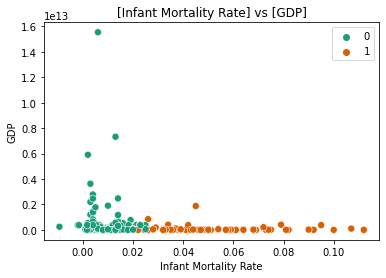

In [119]:
preds = mdl_2cluster.labels_
df_k2 = df_removed.copy()
df_k2['Cluster'] = preds
display(df_k2)
# 1. "GDP" vs "Infant Mortality Rate"
sns.scatterplot(x='Infant Mortality Rate',y='GDP',hue = preds,data=df_k2, s=50,legend = True, palette='Dark2').set(title='[Infant Mortality Rate] vs [GDP]')







[Text(0.5, 1.0, '[Infant Mortality Rate] vs [Life Expectancy Female]')]

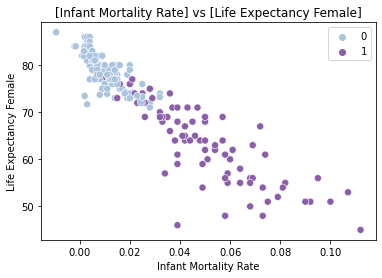

In [120]:
# 2. "Life Expectancy Female" vs "Infant Mortality Rate"
sns.scatterplot(x='Infant Mortality Rate',y='Life Expectancy Female',hue = preds,data=df_k2, s=50,legend = True, palette='BuPu').set(title='[Infant Mortality Rate] vs [Life Expectancy Female]')





[Text(0.5, 1.0, '[Mobile Phone Usage] vs [Internet Usage]')]

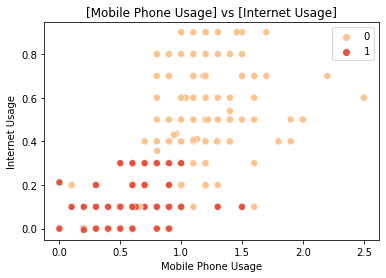

In [123]:

#3. "Mobile Phone Usage" vs "Internet Usage"

sns.scatterplot(x='Mobile Phone Usage',y='Internet Usage',hue = preds,data=df_k2, s=50,legend = True, palette='OrRd').set(title='[Mobile Phone Usage] vs [Internet Usage]')
